# Feature Engineering

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [109]:
df=pd.read_csv('dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [110]:
df.shape

(373, 15)

#### ENCODING CATEGORICAL DATA

#### Two categorical columns: M/F and Group.

In [106]:
# from sklearn.preprocessing import OneHotEncoder

# # Create instance of OneHotEncoder.
# ohe = OneHotEncoder()

# # Perform OneHotEncoding on the Group column.
# df_ohe1 = pd.DataFrame(ohe.fit_transform(df[['Group']]).toarray(), columns=ohe.categories_)

# # Merge OneHotEncoded column with df dataframe.
# df2 = df.join(df_ohe1)

# # View dataframe.
# df2.head()

In [107]:
# # Perform OneHotEncoding on the M/F column.
# df_ohe2 = pd.DataFrame(ohe.fit_transform(df[['M/F']]).toarray(), columns=ohe.categories_)

# # Merge OneHotEncoded column with dataframe.
# df_final = df2.join(df_ohe2)

# # View final dataframe.
# # df_final

In [6]:
# df = df_final

In [111]:
df=pd.concat([df,pd.get_dummies(df['Group'])],axis=1)
df=pd.concat([df,pd.get_dummies(df['M/F'])],axis=1)

#### We can decide to drop the Group and M/F columns since they have been encoded.

In [112]:
df.drop(['Group', 'M/F'], axis=1, inplace=True)
df

,Subject ID,MRI ID,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Converted,Demented,Nondemented,F,M
0,OAS2_0001,OAS2_0001_MR1,1,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0,0,1,0,1
1,OAS2_0001,OAS2_0001_MR2,2,457,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0,0,1,0,1
2,OAS2_0002,OAS2_0002_MR1,1,0,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,0,1,0,0,1
3,OAS2_0002,OAS2_0002_MR2,2,560,R,76,12,NaN,28.0,0.5,1738,0.713,1.010,0,1,0,0,1
4,OAS2_0002,OAS2_0002_MR3,3,1895,R,80,12,NaN,22.0,0.5,1698,0.701,1.034,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,2,842,R,82,16,1.0,28.0,0.5,1693,0.694,1.037,0,1,0,0,1
369,OAS2_0185,OAS2_0185_MR3,3,2297,R,86,16,1.0,26.0,0.5,1688,0.675,1.040,0,1,0,0,1
370,OAS2_0186,OAS2_0186_MR1,1,0,R,61,13,2.0,30.0,0.0,1319,0.801,1.331,0,0,1,1,0
371,OAS2_0186,OAS2_0186_MR2,2,763,R,63,13,2.0,30.0,0.0,1327,0.796,1.323,0,0,1,1,0


For __Feature Engineering__ the __Train data__ should only be taken into consideration for the statistics value and 

then these values will be then used for both train and test. This is the best and optimal way to prevent the 

overfitting later in Model Building part.

In [113]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop('CDR' , axis=1) , df['CDR'] , test_size=0.2 , 
                                                      random_state=2, shuffle = True)
#I added shuffle

In [114]:
X_train.shape , X_test.shape

((298, 17), (75, 17))

### 1) Missing Value Imputation
- by Median Imputation method

In [115]:
missing_variables = [feature for feature in df.columns if df[feature].isnull().sum()>0]
X_train[missing_variables].isnull().mean()

SES     0.053691
MMSE    0.006711
dtype: float64

So SES has 5% of missing values and MMSE has .05% of missign values

In [116]:
median_SES = X_train['SES'].median()
X_train['SES_imputed'] = X_train['SES'].fillna(median_SES)
X_test['SES_imputed'] = X_test['SES'].fillna(median_SES)

In [117]:
median_MMSE = df['MMSE'].median()
X_train['MMSE_imputed'] = df['MMSE'].fillna(median_MMSE)
X_test['MMSE_imputed'] = X_test['MMSE'].fillna(median_SES)

2 New variables Created for the analysis and it later will be removed

In [118]:
X_train.head()

,Subject ID,MRI ID,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Converted,Demented,Nondemented,F,M,SES_imputed,MMSE_imputed
225,OAS2_0106,OAS2_0106_MR1,1,0,R,70,11,4.0,22.0,1445,0.722,1.214,0,1,0,1,0,4.0,22.0
100,OAS2_0048,OAS2_0048_MR4,4,970,R,68,16,1.0,7.0,1714,0.682,1.024,0,1,0,0,1,1.0,7.0
270,OAS2_0129,OAS2_0129_MR3,3,1591,R,82,18,1.0,29.0,1442,0.644,1.217,0,0,1,1,0,1.0,29.0
108,OAS2_0051,OAS2_0051_MR2,2,457,R,94,23,1.0,29.0,1474,0.696,1.190,0,0,1,1,0,1.0,29.0
344,OAS2_0175,OAS2_0175_MR2,2,700,R,72,16,4.0,28.0,1796,0.732,0.977,0,1,0,0,1,4.0,28.0


In [119]:
X_test.head()

,Subject ID,MRI ID,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Converted,Demented,Nondemented,F,M,SES_imputed,MMSE_imputed
173,OAS2_0079,OAS2_0079_MR3,3,1435,R,73,12,4.0,16.0,1478,0.696,1.188,0,1,0,1,0,4.0,16.0
205,OAS2_0098,OAS2_0098_MR1,1,0,R,66,12,4.0,30.0,1446,0.780,1.214,0,1,0,0,1,4.0,30.0
70,OAS2_0036,OAS2_0036_MR4,4,1770,R,73,13,4.0,30.0,1360,0.773,1.291,0,0,1,1,0,4.0,30.0
118,OAS2_0056,OAS2_0056_MR1,1,0,R,71,14,2.0,28.0,1461,0.756,1.202,0,0,1,1,0,2.0,28.0
32,OAS2_0017,OAS2_0017_MR5,5,2400,R,86,12,3.0,27.0,1813,0.761,0.968,0,0,1,0,1,3.0,27.0


__Cheking out the distribution after imputation__

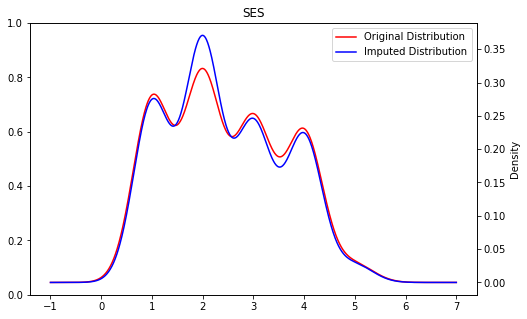

In [120]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['SES'].plot.density(color='red' , label='Original Distribution')

X_train['SES_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('SES')
plt.show()

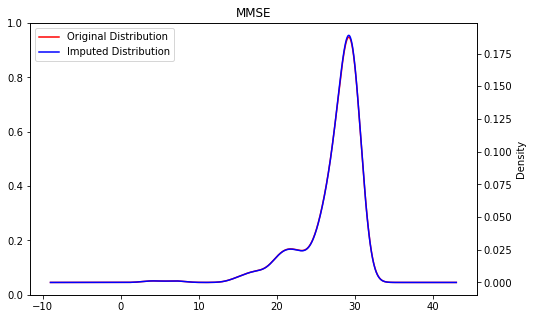

In [121]:
fig , ax = plt.subplots(figsize=(8,5))
ax2=ax.twinx()

X_train['MMSE'].plot.density(color='red' , label='Original Distribution')

X_train['MMSE_imputed'].plot.density(color='blue' , label='Imputed Distribution')

plt.legend()
plt.title('MMSE')
plt.show()

We can see the there is the distortion of the original varible distribution in Variable `SSE` as the missing data is 5%.

But not in the `MMSE` variable

__Variance__

In [122]:
X_train['SES'].var() , X_train['SES_imputed'].var()  
# so we can also see the change in the variance

(1.331213245501123, 1.2703319548957133)

In [123]:
X_train['MMSE'].var() , X_train['MMSE_imputed'].var()  
# almost same 

(14.179374713696708, 14.104772557792709)

__Covariance__

In [124]:
X_train.cov()

,Visit,MR Delay,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Converted,Demented,Nondemented,F,M,SES_imputed,MMSE_imputed
Visit,0.811968,515.336271,0.886358,0.087678,-0.042503,-0.104776,20.697015,-0.003238,-0.017401,0.003638,-0.044042,0.040404,-0.028021,0.028021,-0.041828,-0.096604
MR Delay,515.336271,395815.868676,730.822102,97.291427,-3.478181,188.181688,15685.625201,-1.388775,-13.121528,8.424604,-49.513830,41.089226,-12.570470,12.570470,-1.712336,189.603518
Age,0.886358,730.822102,56.575565,-1.316939,-0.309508,1.980039,28.469550,-0.136960,-0.015140,0.268479,-0.303833,0.035354,0.316656,-0.316656,-0.284094,1.952851
EDUC,0.087678,97.291427,-1.316939,8.409565,-2.435173,1.883406,143.208912,-0.001161,-0.106553,0.088491,-0.369636,0.281145,-0.121641,0.121641,-2.259191,1.840339
SES,-0.042503,-3.478181,-0.309508,-2.435173,1.331213,-0.571969,-54.256076,0.003587,0.041696,-0.077408,0.111885,-0.034477,0.011812,-0.011812,1.331213,-0.571969
MMSE,-0.104776,188.181688,1.980039,1.883406,-0.571969,14.179375,-12.680486,0.050360,0.014042,0.154375,-1.172229,1.017854,0.365552,-0.365552,-0.516285,14.179375
eTIV,20.697015,15685.625201,28.469550,143.208912,-54.256076,-12.680486,30800.405215,-1.176455,-23.828714,-2.050189,-0.831966,2.882155,-46.432242,46.432242,-49.979775,-16.410684
nWBV,-0.003238,-1.388775,-0.136960,-0.001161,0.003587,0.050360,-1.176455,0.001368,0.000923,-0.000390,-0.005039,0.005429,0.003876,-0.003876,0.003550,0.050113
ASF,-0.017401,-13.121528,-0.015140,-0.106553,0.041696,0.014042,-23.828714,0.000923,0.018866,0.000948,0.000803,-0.001751,0.035655,-0.035655,0.038284,0.017635
Converted,0.003638,8.424604,0.268479,0.088491,-0.077408,0.154375,-2.050189,-0.000390,0.000948,0.096174,-0.042302,-0.053872,0.009242,-0.009242,-0.070571,0.152057


We can see that Variable covariance is also changed for the `SES` variable but for the `MMSE` is almost same there is no change

So after all the inferences derived after the imputation . We come to a conclusion to make the additional missing indicator for the variable `SES`

In [125]:
# 1 for missing and 0 for not missing

X_train['missing_indicator_SES'] = np.where(X_train['SES'].isnull() , 1 , 0)  
X_test['missing_indicator_SES'] = np.where(X_test['SES'].isnull() , 1 , 0)

In [126]:
X_train.head()

,Subject ID,MRI ID,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Converted,Demented,Nondemented,F,M,SES_imputed,MMSE_imputed,missing_indicator_SES
225,OAS2_0106,OAS2_0106_MR1,1,0,R,70,11,4.0,22.0,1445,0.722,1.214,0,1,0,1,0,4.0,22.0,0
100,OAS2_0048,OAS2_0048_MR4,4,970,R,68,16,1.0,7.0,1714,0.682,1.024,0,1,0,0,1,1.0,7.0,0
270,OAS2_0129,OAS2_0129_MR3,3,1591,R,82,18,1.0,29.0,1442,0.644,1.217,0,0,1,1,0,1.0,29.0,0
108,OAS2_0051,OAS2_0051_MR2,2,457,R,94,23,1.0,29.0,1474,0.696,1.190,0,0,1,1,0,1.0,29.0,0
344,OAS2_0175,OAS2_0175_MR2,2,700,R,72,16,4.0,28.0,1796,0.732,0.977,0,1,0,0,1,4.0,28.0,0


In [127]:
X_test.head()

,Subject ID,MRI ID,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF,Converted,Demented,Nondemented,F,M,SES_imputed,MMSE_imputed,missing_indicator_SES
173,OAS2_0079,OAS2_0079_MR3,3,1435,R,73,12,4.0,16.0,1478,0.696,1.188,0,1,0,1,0,4.0,16.0,0
205,OAS2_0098,OAS2_0098_MR1,1,0,R,66,12,4.0,30.0,1446,0.780,1.214,0,1,0,0,1,4.0,30.0,0
70,OAS2_0036,OAS2_0036_MR4,4,1770,R,73,13,4.0,30.0,1360,0.773,1.291,0,0,1,1,0,4.0,30.0,0
118,OAS2_0056,OAS2_0056_MR1,1,0,R,71,14,2.0,28.0,1461,0.756,1.202,0,0,1,1,0,2.0,28.0,0
32,OAS2_0017,OAS2_0017_MR5,5,2400,R,86,12,3.0,27.0,1813,0.761,0.968,0,0,1,0,1,3.0,27.0,0


In [128]:
X_train.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)
X_test.drop(['SES' , 'MMSE'] , axis=1 , inplace=True)

In [129]:
X_train.head()

,Subject ID,MRI ID,Visit,MR Delay,Hand,Age,EDUC,eTIV,nWBV,ASF,Converted,Demented,Nondemented,F,M,SES_imputed,MMSE_imputed,missing_indicator_SES
225,OAS2_0106,OAS2_0106_MR1,1,0,R,70,11,1445,0.722,1.214,0,1,0,1,0,4.0,22.0,0
100,OAS2_0048,OAS2_0048_MR4,4,970,R,68,16,1714,0.682,1.024,0,1,0,0,1,1.0,7.0,0
270,OAS2_0129,OAS2_0129_MR3,3,1591,R,82,18,1442,0.644,1.217,0,0,1,1,0,1.0,29.0,0
108,OAS2_0051,OAS2_0051_MR2,2,457,R,94,23,1474,0.696,1.190,0,0,1,1,0,1.0,29.0,0
344,OAS2_0175,OAS2_0175_MR2,2,700,R,72,16,1796,0.732,0.977,0,1,0,0,1,4.0,28.0,0


In [130]:
X_test.head()

,Subject ID,MRI ID,Visit,MR Delay,Hand,Age,EDUC,eTIV,nWBV,ASF,Converted,Demented,Nondemented,F,M,SES_imputed,MMSE_imputed,missing_indicator_SES
173,OAS2_0079,OAS2_0079_MR3,3,1435,R,73,12,1478,0.696,1.188,0,1,0,1,0,4.0,16.0,0
205,OAS2_0098,OAS2_0098_MR1,1,0,R,66,12,1446,0.780,1.214,0,1,0,0,1,4.0,30.0,0
70,OAS2_0036,OAS2_0036_MR4,4,1770,R,73,13,1360,0.773,1.291,0,0,1,1,0,4.0,30.0,0
118,OAS2_0056,OAS2_0056_MR1,1,0,R,71,14,1461,0.756,1.202,0,0,1,1,0,2.0,28.0,0
32,OAS2_0017,OAS2_0017_MR5,5,2400,R,86,12,1813,0.761,0.968,0,0,1,0,1,3.0,27.0,0


In [131]:
X_train.isnull().sum()

Subject ID               0
MRI ID                   0
Visit                    0
MR Delay                 0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
Converted                0
Demented                 0
Nondemented              0
F                        0
M                        0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

In [132]:
X_test.isnull().sum()

Subject ID               0
MRI ID                   0
Visit                    0
MR Delay                 0
Hand                     0
Age                      0
EDUC                     0
eTIV                     0
nWBV                     0
ASF                      0
Converted                0
Demented                 0
Nondemented              0
F                        0
M                        0
SES_imputed              0
MMSE_imputed             0
missing_indicator_SES    0
dtype: int64

__So there are now no missing data in the dataset__

In [133]:
# We changed the 4 class to 0,1,2,an 3 so that the model don't see it as a continous value
y_test=y_test.replace({0.0:0, 0.5:1, 1.0:2, 2.0:3}).astype('int')
y_train=y_train.replace({0.0:0, 0.5:1, 1.0:2, 2.0:3}).astype('int')

In [134]:
# We drop the columns that are not useful to the model
X_train.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1, inplace=True)
X_test.drop(['Subject ID', 'MRI ID', 'Hand'], axis=1, inplace=True)

In [88]:
# We can use this binary classification to predict the probability of 
# a patient have dementia

# def proba(n):
#     if n == 0:
#         return 0
#     else:
#         return 1


# df['yy'] = df['CDR'].apply(lambda x: proba(x))

## Modeling

In [92]:
#Function for creating a dataframe based on order of importance of features
def feat_imp_sorter(model, x):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    feature_imp = pd.DataFrame(zip(model.feature_importances_,x.columns), columns=['Value','Features'])
    feature_imp.sort_values(by='Value',ignore_index=True, ascending=False, inplace = True)
    return feature_imp
    
#fUnction for ploting barplot for the feature importance of any model    
def feat_imp_ploter(model,x):
    sorted_feat = feat_imp_sorter(model,x)
#     print(sorted_feat.shape)
    
    plt.figure(figsize=(5, 5))
    sns.barplot(x="Value", y="Features", data=sorted_feat)
    plt.title(str(model) +'Features_important')
    plt.tight_layout()


In [139]:
from sklearn.metrics import f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

### Base_Model: LogisticRegression

In [153]:
base_model = LogisticRegression()
base_model.fit(X_train,y_train)

print(f1_score(y_test,base_model.predict(X_test), average='weighted'))

0.5018181818181818


C:\Users\LEKAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [156]:
print(classification_report(y_test, base_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73        42
           1       0.33      0.23      0.27        26
           2       0.00      0.00      0.00         7

    accuracy                           0.56        75
   macro avg       0.32      0.36      0.33        75
weighted avg       0.47      0.56      0.50        75



C:\Users\LEKAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### GradientBoostingClassifier

Fitting the model and evaluating the model using *F1 score*. F1 score was chosen as the metrics because it takes into consideration *PRECISION* and *RECALL*

In [135]:
gbt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5,
                           max_depth=4,random_state = 7)
gbt.fit(X_train,y_train)

print(f1_score(y_test,gbt.predict(X_test), average='weighted'))

0.9324238026124819


An overall report of the performance of the model

In [141]:
print(classification_report(y_test, gbt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.89      0.92      0.91        26
           2       0.83      0.71      0.77         7

    accuracy                           0.93        75
   macro avg       0.90      0.87      0.88        75
weighted avg       0.93      0.93      0.93        75



In [136]:
gbt.predict(X_test)

array([2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0])

From the result above Gradient boosting classifier did well having a F1 score of 93 and it is also noticed that no class 3 was predicted by the model. This can be as a result of the size of the data and the little representation of the class compared to others

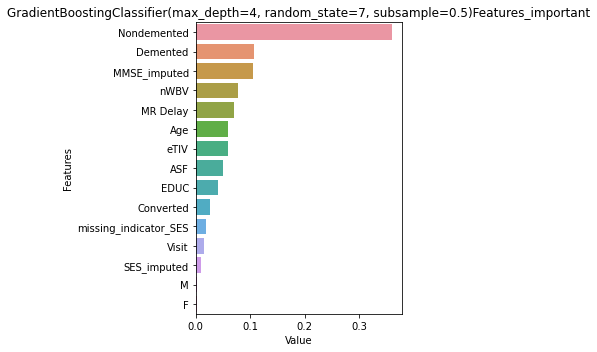

In [96]:
feat_imp_ploter(gbt, X_train)

According to the barplot based on Feature Importance *Nondemented* has the highest influence on the predictions of the model, which is obviously supposed to be. As well this might be considered a data leakage

### RandomForestClassifier

In [146]:
rfc = RandomForestClassifier(n_estimators=100,
                           max_depth=7,random_state = 7)
rfc.fit(X_train,y_train)

print(f1_score(y_test,rfc.predict(X_test), average='weighted'))

0.8864530270020465


An overall report of the performance of the model

In [147]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.82      0.88      0.85        26
           2       0.75      0.43      0.55         7

    accuracy                           0.89        75
   macro avg       0.84      0.76      0.79        75
weighted avg       0.89      0.89      0.89        75



In [148]:
rfc.predict(X_test)

array([1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0])

From the result above report RandomForest classifier have a F1 score of 89 and it is also noticed that no class 3 was predicted by the model as well.

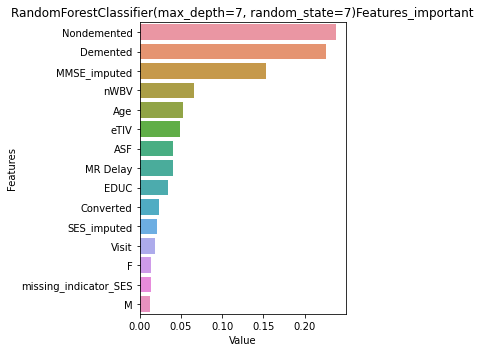

In [105]:
feat_imp_ploter(gbt, X_train)

According to the barplot based on Feature Importance *Nondemented* and *Demented* have higher influence on the predictions of the model. It can also be seen that the Gender *M*, *F* bare have any influence on the model's decisions. Therefore it can be considered dropping them to see how the model performs.

### DecisionTreeClassifier

In [163]:
dtc = DecisionTreeClassifier(max_depth=3,random_state = 7)#I tried different max_depth 10, 9, 7,3

dtc.fit(X_train,y_train)

print(f1_score(y_test,dtc.predict(X_test), average='weighted'))

0.9197020560875983


An overall report of the performance of the model

In [165]:
print(classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.86      0.92      0.89        26
           2       0.83      0.71      0.77         7

    accuracy                           0.92        75
   macro avg       0.89      0.86      0.87        75
weighted avg       0.92      0.92      0.92        75



In [166]:
dtc.predict(X_test)

array([2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0, 2, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0])

From the result above report DecisionTreeClassifier have a F1 score of 91 and no class 3 was predicted. Its results is almost same as GradientBoosting.

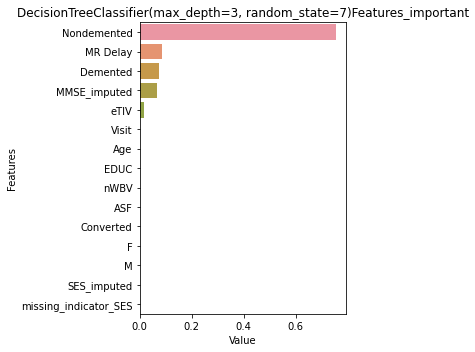

In [167]:
feat_imp_ploter(dtc, X_train)

Wow, Here the barplot speaks for itself concerning the *Feature Importance* of the model

Other things we might consider:
   - normalising the data although convectionally it has no/little effect on tree model
   - we might consider dropping some features e.g M, F
   - we can also do little hyperparameter tuning
   - we can also use different models like Ada, Catboost, Xgboost but i feel they might be heavy for our little dataset
   - also if time permits try some feature combination...